# Linear regression model

## Simple linear regression

### Example 1 (Laptop data)

As an illustrative example, consider a case of a company that markets and repairs small computers.  To study the relationship between the length of a  service call and the number of electronic components in the computer that must be repaired or replaced, a sample of records on service calls was taken.  The data consists of the length of service calls in minutes (the response variable) and the number of components repaired (the only predictor variable). Fit a linear regression on this data.

In [3]:
# Importing the data 
import os
import pandas as pd

os.chdir("F:\\STAT\\UP University\\STK 353\\Codes")

laptop_repair = pd.read_csv("laptop_repair.txt", sep=" ")
laptop_repair

,Minutes,Units
0,23,1
1,29,2
2,49,3
3,64,4
4,74,4
5,87,5
6,96,6
7,97,6
8,109,7
9,119,8


In [4]:
# Defining the response and the predictor variables

y = laptop_repair.Minutes
x = laptop_repair.Units.values.reshape(-1, 1) 

# In linear regression, the reshape(-1, 1) operation is used for the predictors only but not for the target variable
# This is because the target variable is typically expected to be a 1-dimensional array or a vector.
# The reshape(-1, 1) operation is used to convert a 1-dimensional array into a 2-dimensional array with a single column.
# For scikit-learn's linear regression model, the predictors (X) are expected to be a 2-dimensional array,
# where each row represents a sample and each column represents a feature.

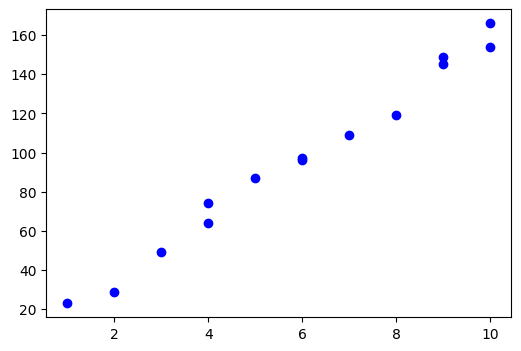

In [5]:
# Inpection of the data using the scatter plot in order to find a potential linear relationship:
import matplotlib.pyplot as plt

plt.figure(figsize = (6, 4))
plt.scatter(x, y, color='blue', label = "Observed data")
plt.show()

In [6]:
# To ensure that the linear relationship exists:
laptop_repair.corr()

,Minutes,Units
Minutes,1.000000,0.993699
Units,0.993699,1.000000


In [7]:
# Fitting the linear regression model:

from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(x, y)
model.coef_, model.intercept_

(array([15.50877193]), 4.161654135338296)

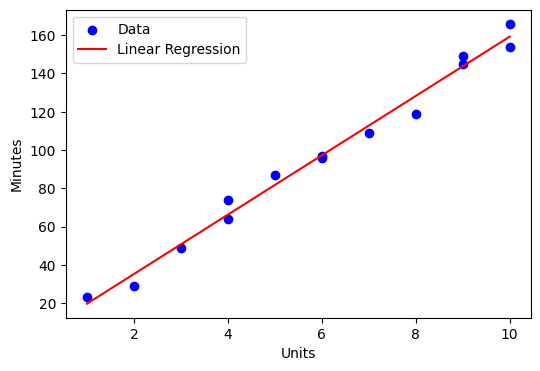

In [8]:
# Plot the data points and the regression line together
plt.figure(figsize = (6, 4))
plt.scatter(x, y, color='blue', label='Data')
plt.plot(x, model.predict(x), color='red', label='Linear Regression')
plt.xlabel('Units')
plt.ylabel('Minutes')
plt.legend()
plt.show()

In [9]:
# Model evaluation: here we evaluate the model based on the entire data points. In the next example, 
# we will use the test data instead.

y_pred = model.predict(x)
#r2 = r2_score(y_test, y_pred)
laptop_repair["Y_pred"] = y_pred
laptop_repair

,Minutes,Units,Y_pred
0,23,1,19.670426
1,29,2,35.179198
2,49,3,50.687970
3,64,4,66.196742
4,74,4,66.196742
5,87,5,81.705514
6,96,6,97.214286
7,97,6,97.214286
8,109,7,112.723058
9,119,8,128.231830


In [10]:
# Using the R_Squared:
from sklearn.metrics import r2_score
r2_score(y, y_pred)

0.9874371980620736

In [11]:
# Using the trained model to predict a new observation:
x_new = np.array([13, 15, 20])
model.predict(x_new.reshape(-1, 1))

NameError: name 'np' is not defined

### Example 2 (ais data)
The ais data set contains some information on the 102 male and 100 female athletes collected at the Australian Institute of Sport. The variables included are as follows:

- [,1]	`sex`:   categorical, levels: female, male
- [,2]  `sport`:  categorical, levels: B_Ball, Field, Gym, Netball, Row, Swim, T_400m, Tennis, T_Sprnt, W_Polo
- [,3]	`RCC`:	red cell count (numeric)
- [,4]	`WCC`:	white cell count (numeric)
- [,5]	`Hc`:	Hematocrit (numeric)
- [,6]	`Hg`:	Hemoglobin (numeric)
- [,7]	`Fe`:	plasma ferritin concentration (numeric)
- [,8]	`BMI`:	body mass index, weight/(height)^2 (numeric)
- [,9]	`SSF`:	sum of skin folds (numeric)
- [,10]	`Bfat`:	body fat percentage (numeric)
- [,11]	`LBM`:	lean body mass (numeric)
- [,12]	`Ht`:	height, cm (numeric)
- [,13]	`Wt`:	weight, kg (numeric)

Fit a linear regression model considering `LBM` as the response variable and `Ht` as the explanatory variable.

In [1]:
import pandas as pd
ais = pd.read_csv("ais.txt", sep = " ")
del ais["ID"]
ais

,sex,sport,RCC,WCC,Hc,Hg,Fe,BMI,SSF,Bfat,LBM,Ht,Wt
0,female,B_Ball,3.96,7.5,37.5,12.3,60,20.56,109.1,19.75,63.32,195.9,78.9
1,female,B_Ball,4.41,8.3,38.2,12.7,68,20.67,102.8,21.30,58.55,189.7,74.4
2,female,B_Ball,4.14,5.0,36.4,11.6,21,21.86,104.6,19.88,55.36,177.8,69.1
3,female,B_Ball,4.11,5.3,37.3,12.6,69,21.88,126.4,23.66,57.18,185.0,74.9
4,female,B_Ball,4.45,6.8,41.5,14.0,29,18.96,80.3,17.64,53.20,184.6,64.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,male,W_Polo,4.90,7.6,45.6,16.0,90,27.56,67.2,11.79,82.00,183.9,93.2
198,male,Tennis,5.66,8.3,50.2,17.7,38,23.76,56.5,10.05,72.00,183.5,80.0
199,male,Tennis,5.03,6.4,42.7,14.3,122,22.01,47.6,8.51,68.00,183.1,73.8
200,male,Tennis,4.97,8.8,43.0,14.9,233,22.34,60.4,11.50,63.00,178.4,71.1


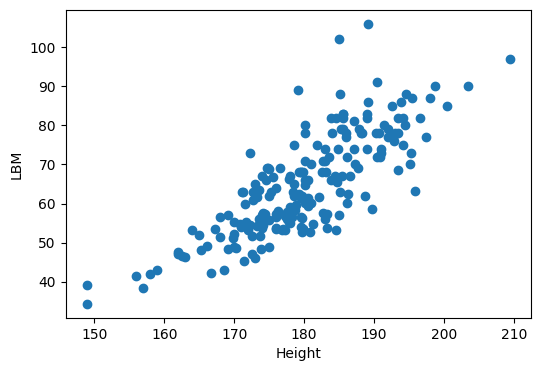

In [76]:
x = ais.Ht.values.reshape(-1, 1)
y = ais.LBM

import matplotlib.pyplot as plt
plt.figure(figsize = (6, 4))
plt.scatter(x, y)
plt.xlabel('Height')
plt.ylabel('LBM')
plt.xlabel('Height')
plt.show()

In [77]:
# Splitting the data into train and test:

import numpy as np # we need the np.random 

n = len(y)
np.random.seed(12345) # setting the seed to get the same results for different executions of the code.
i = np.random.choice(y.index, size = n, replace = False) # This will be used to make a new permutation for the entire data points.

n_train = 140  # 140 ~= 0.7 * 202

# First we need a new permutation for the entire data points using y[i] and x[i]. Then, we split them:
y_train = y[i][:n_train] 
x_train = x[i][:n_train]

y_test = y[i][n_train:]
x_test = x[i][n_train:]


from sklearn.linear_model import LinearRegression

# Fitting the regression model on the train data

model = LinearRegression().fit(x_train, y_train)
model.coef_, model.intercept_

(array([1.05408]), -124.7650688122474)

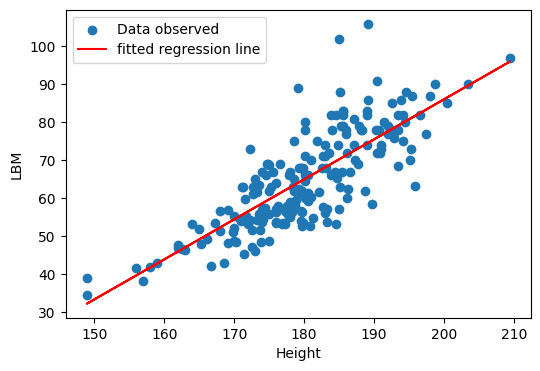

In [78]:
plt.figure(figsize = (6, 4))
plt.scatter(x, y, label = "Data observed")
plt.plot(x, model.predict(x), color = 'red', label = "fitted regression line")
plt.xlabel('Height')
plt.ylabel("LBM")
plt.legend()
plt.show()

In [79]:
# Evaluation of the models based on the test data points which are not already used for training the model:

# Performance metric chosen: The coefficient of determination or R_Squared as the proportion of 
# the total variability in the response variable Y  that is accounted for by the predictor variable(s)
# It ranges from 0 to 1 and larger values correspond to better regression models.

from sklearn.metrics import r2_score
y_pred = model.predict(x_test)
r2_score(y_test, y_pred)


0.6511169294306844

In [83]:
# Checking whether the model has a good fit or not: 
# To this end, we need to evaluate the model based on both of the train and the test

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

mean_squared_error(y_train, model.predict(x_train)), mean_squared_error(y_test, model.predict(x_test))

(60.51477879507607, 61.14688299538463)

In [85]:
mean_absolute_error(y_train, model.predict(x_train)), mean_absolute_error(y_test, model.predict(x_test))

(6.070411158513666, 5.72107836241579)

In [84]:
r2_score(y_train, model.predict(x_train)), r2_score(y_test, model.predict(x_test))

(0.6389849685160451, 0.6511169294306844)

## Multiple linear regression model

### Example 3 (ais data once again!)
Now, we are going to fit a multiple linear regression model based on all of the explanatory variables except `sex` and `sport` which are categorical.


In [2]:
# Note that besides sex and sport, we should also remove BMI variable, 
# since it is a clear funcation of Ht and Wt

X = ais[["Ht", "Wt", "RCC", "Hg", "WCC", "Hc", "Fe", "SSF",	"Bfat"]]
y = ais.LBM

import numpy as np

np.random.seed(12345)
i = np.random.choice(y.index, size = len(y), replace = True)

n_train = 140

X_train = X.loc[i][:n_train]
y_train = y.loc[i][:n_train]

X_test = X.loc[i][n_train:]
y_test = y.loc[i][n_train:]


from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X_train, y_train)
model.intercept_, model.coef_

(2.674373746428998,
 array([ 4.48454832e-02,  8.56384419e-01,  3.05033704e-01,  1.14655167e-01,
        -9.44968801e-04, -7.36999903e-02, -3.65796914e-04, -1.63397591e-02,
        -6.52301954e-01]))

In [9]:
# The performance?

from sklearn.metrics import r2_score

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
r2

0.9977519755094116

In [5]:
# Is it a good fit/overfit/underfit?

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

mean_squared_error(y_train, model.predict(X_train)), mean_squared_error(y_test, model.predict(X_test))

(0.3008650058194582, 0.32375013709877554)

In [6]:
mean_absolute_error(y_train, model.predict(X_train)), mean_absolute_error(y_test, model.predict(X_test))

(0.44610794512976987, 0.4526134277860264)

In [10]:
r2r2_score(y_train, model.predict(X_train)), r2_score(y_test, model.predict(X_test))
print("The metrics do not differ from one another significantly")
print("The r2_score is", r2)

The metrics do not differ from one another significantly
The r2_score is 0.9977519755094116


In [67]:
# Variable selection: The sklearn can not directly be used for the variable selection purpose. To this end, we can alternatively do the 
# regression using the statsmodels.api package as follows: 

import statsmodels.api as sm
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    LBM   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          2.037e+05
Date:                Wed, 11 Oct 2023   Prob (F-statistic):                   6.03e-267
Time:                        10:24:37   Log-Likelihood:                         -116.14
No. Observations:                 140   AIC:                                      250.3
Df Residuals:                     131   BIC:                                      276.8
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Ht             0.0586      0.005     11.841      0.000       0.049       0.068
Wt             0.8468      0.006    133.462      0.000       0.834       0.859
RCC            0.2501      0.288      0.867      0.387      -0.320       0.820
Hg             0.1823      0.150      1.218      0.225      -0.114       0.478
WCC            0.0025      0.035      0.071      0.943      -0.067       0.072
Hc            -0.0734      0.057     -1.296      0.197      -0.185       0.039
Fe            -0.0001      0.001     -0.091      0.927      -0.003       0.002
SSF           -0.0173      0.008     -2.061      0.041      -0.034      -0.001
Bfat          -0.6379      0.040    -15.820      0.000      -0.718      -0.558
==============================================================================
Omnibus:                        0.672   Durbin-Watson:                   2.217
Prob(Omnibus):                  0.714   Jarque-Bera (JB):                0.807
Skew:                          -0.126   Prob(JB):                        0.668
Kurtosis:                       2.726   Cond. No.                     1.34e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.34e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [68]:
X = ais[["Ht", "Wt", "SSF",	"Bfat"]]
y = ais.LBM

import numpy as np

np.random.seed(12345)
i = np.random.choice(y.index, size = len(y), replace = True)

n_train = 140

X_train = X.loc[i][:n_train]
y_train = y.loc[i][:n_train]

X_test = X.loc[i][n_train:]
y_test = y.loc[i][n_train:]


from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_train, y_train)
model.intercept_, model.coef_

(2.526755260455637,
 array([ 0.04468388,  0.85733938, -0.01482241, -0.65962809]))

In [69]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

r2_score(y_train, model.predict(X_train)), r2_score(y_test, model.predict(X_test))

(0.9980511300131897, 0.9978218104454646)

In [70]:
# Prediction of new observations:

import pandas as pd

X_new = {"Ht": [212, 180], "Wt": [100, 90], "SSF": [100, 92], "Bfat": [20, 17]}
X_new = pd.DataFrame(X_new)

X_new

,Ht,Wt,SSF,Bfat
0,212,100,100,20
1,180,90,92,17


In [64]:
model.predict(X_new)

array([83.05887237, 75.15305807])

In [ ]:
# A point:
# In the multiple linear regression, it is best to use the adjusted R-squared rather than the R-squared. 
# The latter usually over-estimate the coefficient of determination. You can simply calculate the adjusted one as follows:

n = X_test.shape[0]  # number of train observations
d = X_test.shape[1]  # number of predictors

# Calculate the adjusted R-squared
r2_adj = 1 - (1 - r2) * (n - 1) / (n - d - 1)

# Additional point:

# The step remained is to check the model diagnostics including

# 1. The normality test for the residuals,
# 2. Checking that whether the variances of the residuals are constant?
# 3. Check that the residuals are uncorrelated.
# 4. To check the multi-colinearity
